In [1]:
include("../src/utilities.jl")
include("../src/crustDistribution.jl")
using StatGeochem
using Plots; gr();
using Statistics
using StatsBase

Loading crust information from file ../resources/crustDistribution.jld


In [3]:
lats = crustDistribution.all_lats
longs = crustDistribution.all_longs

# Load files into maps for easy lat/long lookup
file = "../resources/spiral/SPiRaL_1.4.Interpolated.Surface.12.Crust_12_Bottom_of_upper_crust.txt"
lith_file = "../resources/litho1.0/lith_layer6.csv"
dat = readdlm(file)
indices = readdlm("../resources/spiral/SPiRaL_1.4.Interpolated.Coordinates.txt")

lookup = Dict{Tuple{Float64, Float64},Tuple{Float64, Float64, Float64}}()
for i in 1:size(dat,1)
    # mean vp, mean vs, base of layer depth
    lookup[(indices[i,1],indices[i,2])] = ((dat[i,3]+dat[i,4])/2, (dat[i,5]+dat[i,6])/2, dat[2])
end

vp = [lookup[(lats[i], longs[i])][1] for i in 1:length(lats)]
vs = [lookup[(lats[i], longs[i])][2] for i in 1:length(lats)]
crustbase = [lookup[(lats[i], longs[i])][3] for i in 1:length(lats)]

# rho from crust1
rho_dat, _ = readdlm(lith_file, ',', header=true)
rho_lookup = Dict{Tuple{Float64, Float64},Float64}() # construct lookup dict
for i in 1:size(rho_dat,1)
    rho_lookup[(rho_dat[i,1],rho_dat[i,2])] = rho_dat[i,5]
end
rho = [rho_lookup[(lats[i], longs[i])] for i in 1:length(lats)];



In [4]:
g = globe(lats, longs, vp); # first layer vp

In [31]:
g = globe(lats, longs, vp)
heatmap(g, title="Vp", size=(500,300),xticks=false, framestyle=:box, 
    color=cgrad(:haline), dpi=300, yticks=false)#, yticks=false, xticks=false, tickfontsize=10)# yaxis=false, xaxis=false, yticks=false, xticks=false, tickfontsize=10)
#savefig("spiral_vp_upper.pdf")
savefig("../../thesis/figures/spiral_vp_upper.png")

In [30]:
g = globe(lats, longs, vp./vs)
heatmap(g, title="Vp/Vs", size=(500,300),xticks=false,yticks=false, framestyle=:box, color=cgrad(:haline), dpi=300)
savefig("../../thesis/figures/spiral_vpvs_upper.png")

In [29]:
rho[rho.>3100] .= NaN
rho[rho.<2300] .= NaN
g = globe(lats, longs, rho)
heatmap(g, title="Density", size=(500,300),xticks=false,yticks=false, framestyle=:box, color=cgrad(:haline), dpi=300)
savefig("../../thesis/figures/litho_density_upper.png")

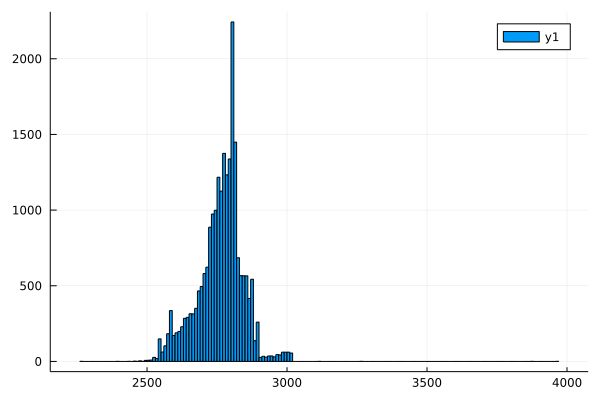

In [13]:
histogram(rho)

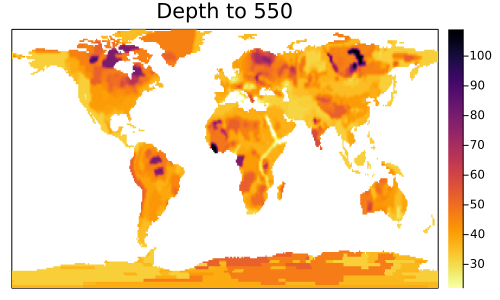

In [36]:
geotherms = crustDistribution.depth[:,1]
g = globe(lats, longs, geotherms)
heatmap(g, title="Depth to 550", size=(500,300),xticks=false,yticks=false, framestyle=:box, 
    color=cgrad(:inferno, rev=true), dpi=300)
#savefig("../../thesis/figures/depth_to_550.png")

# Number of unique crust types

In [7]:
println(size(unique(seismic, dims=1))) # for all crust 
println(size(unique(seismic[:,1:3], dims=1))) # for just upper crust 

(24, 9)
(17, 3)


# Uncertainty estimation 

In [12]:
with_std = seismic[:,1] .+ randn(size(seismic,1)) .* std(seismic[:,1]); 

In [54]:
histogram(seismic[:,1], normalize=:pdf, alpha=.6, linewidth=0, label="Original")
for i in [1,2.5,10]
    with_std = seismic[:,1] .+ randn(size(seismic,1)) .* (i/10)*std(seismic[:,1]); 
    stephist!(with_std, normalize=:pdf, label="Error = $(i/10) x σ", linewidth=2)
end

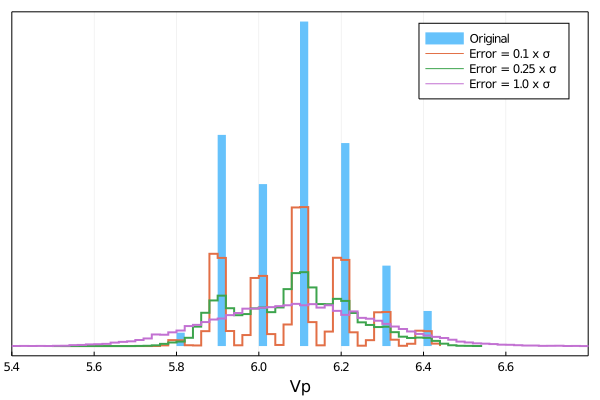

In [58]:
plot!(xlabel="Vp", yticks=false, xlims=(5.4,6.8), framestyle=:box)
#savefig("viz/crust1_uncertainty.png")